In [3]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
#Let's start with importing necessary libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

In [16]:
nba.isnull().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [15]:
nba['fg.']=nba['fg.'].fillna(nba['fg.'].mean())
nba['x2p.']=nba['x2p.'].fillna(nba['x2p.'].mean())
nba['ft.']=nba['ft.'].fillna(nba['ft.'].mean())
nba['efg.']=nba['efg.'].fillna(nba['efg.'].mean())
nba['x3p.']=nba['x3p.'].fillna(nba['x3p.'].mean())

In [17]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [46]:
#nba=nba.drop(columns=['season','season_end','player','pos','bref_team_id'])

In [18]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [21]:
cat_columns=['season','season_end','player','pos','bref_team_id']

In [20]:
nba.isin([0]).sum()

player            0
pos               0
age               0
bref_team_id      0
g                 0
gs              125
mp                0
fg               10
fga               2
fg.               8
x3p             133
x3pa             67
x3p.             66
x2p              12
x2pa              3
x2p.              9
efg.              8
ft               27
fta              20
ft.               7
orb              24
drb               8
trb               5
ast              17
stl              25
blk              46
tov              12
pf                7
pts               8
season            0
season_end        0
dtype: int64

/home/launchship/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/launchship/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/launchship/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

/home/launchship/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


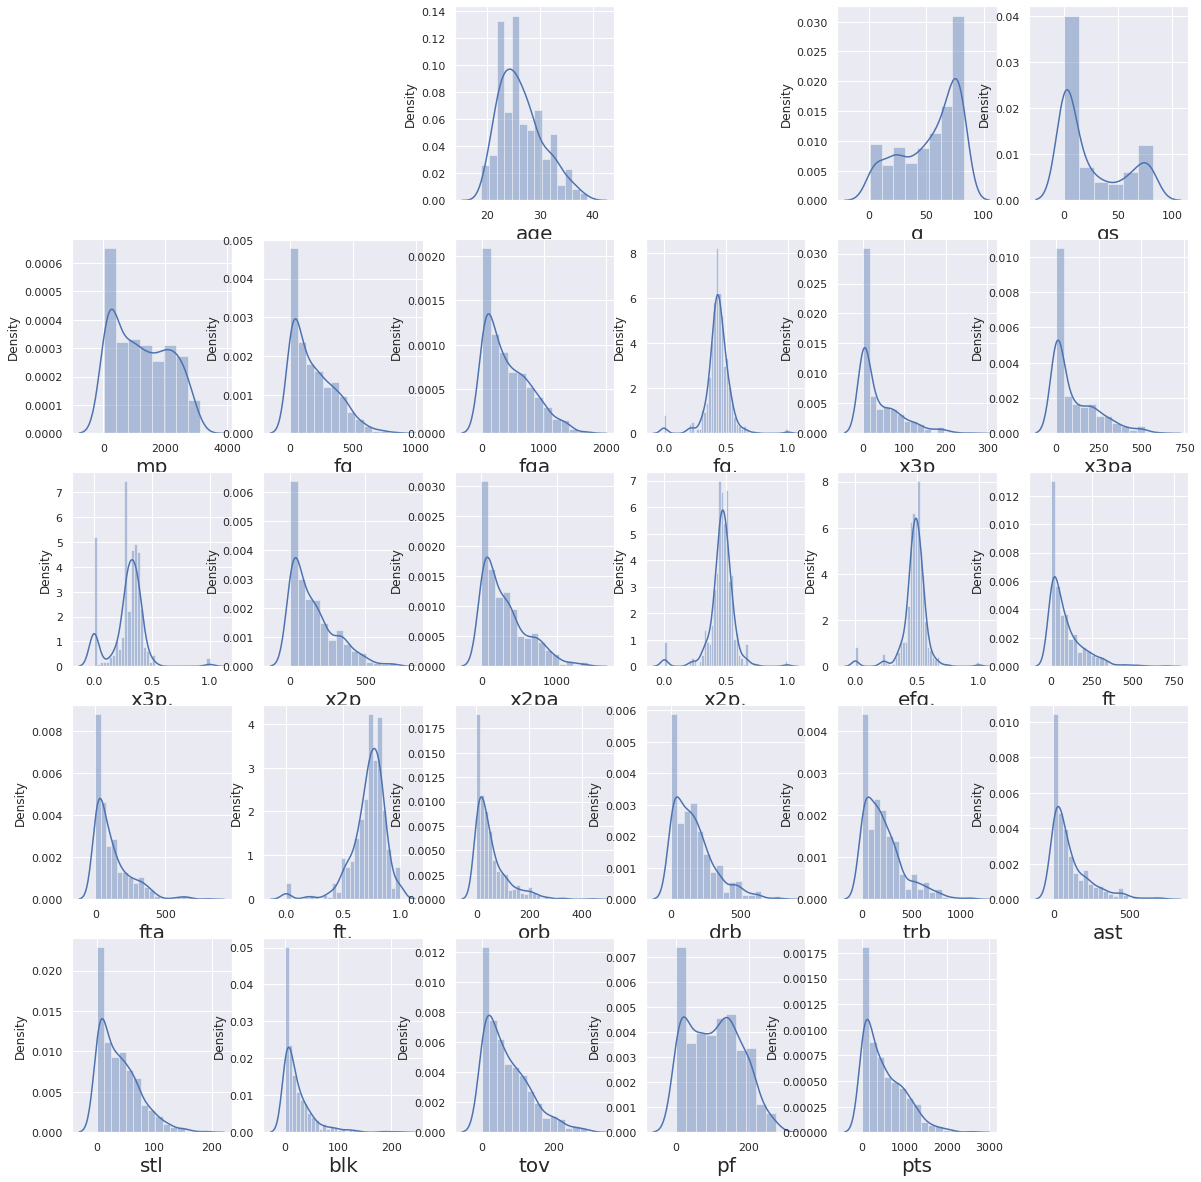

In [23]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in nba:
    if plotnumber<=31 and column not in cat_columns :     # as there are 9 columns in the data
        ax = plt.subplot(6,6,plotnumber)
        sns.distplot(nba[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [25]:
for column in nba:
    if column not in cat_columns : 
        nba[column] = nba[column].replace(0,nba[column].mean())

/home/launchship/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/launchship/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/launchship/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

/home/launchship/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


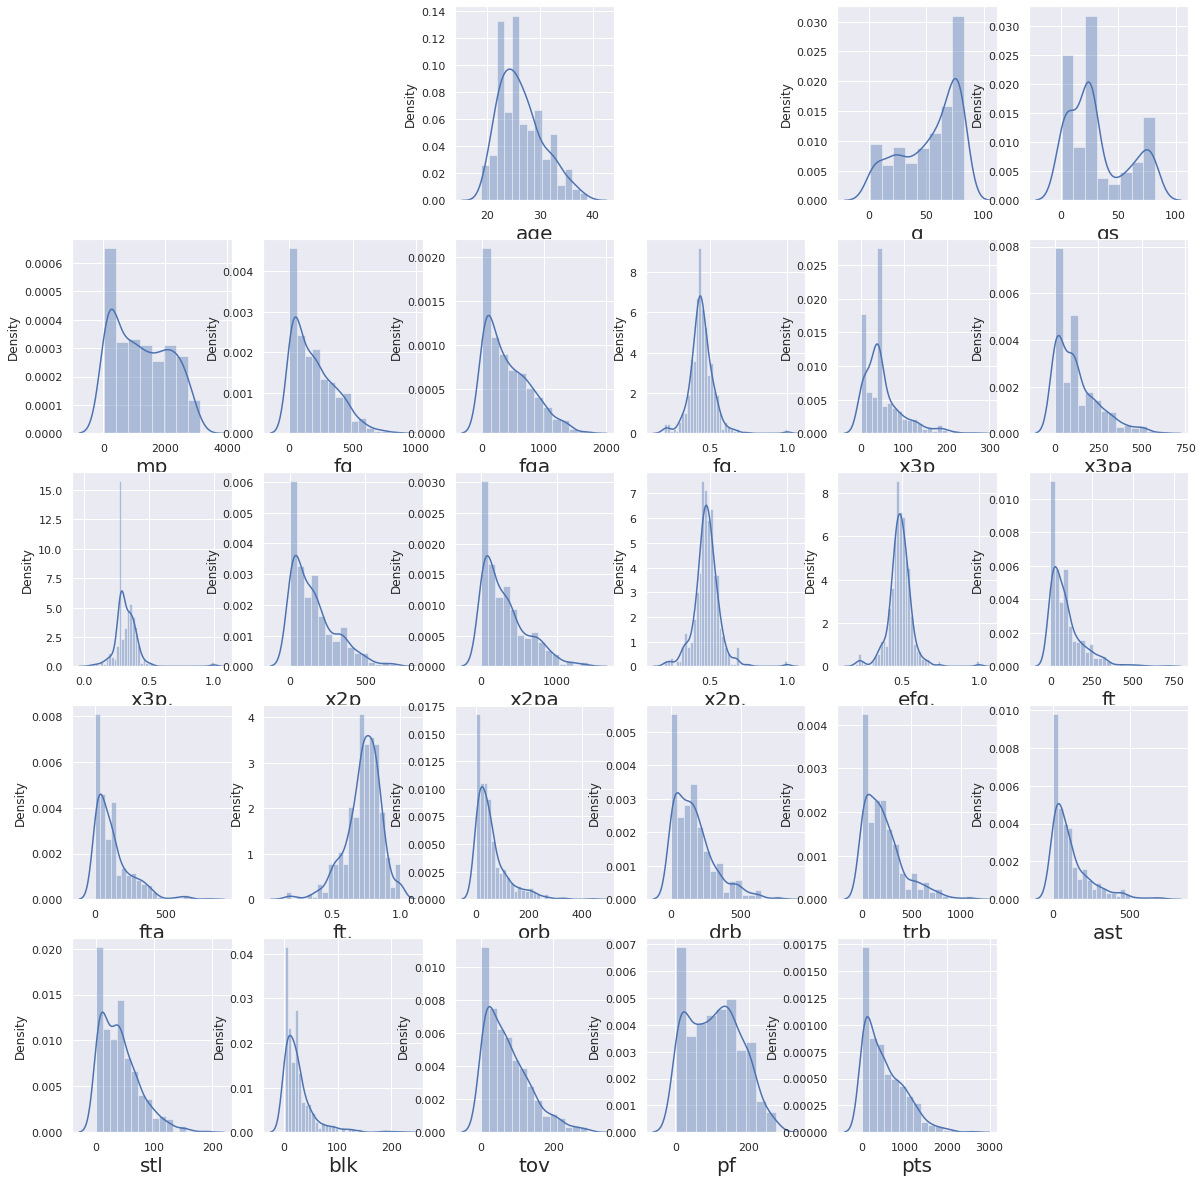

In [26]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in nba:
    if plotnumber<=31 and column not in cat_columns :     # as there are 9 columns in the data
        ax = plt.subplot(6,6,plotnumber)
        sns.distplot(nba[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [27]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,25.571726,847,66.0,141.0,0.468,...,144.0,216.0,28.0,23.0,26.0,30.0,122.0,171.0,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20.000000,1197,93.0,185.0,0.503,...,190.0,332.0,43.0,40.0,57.0,71.0,203.0,265.0,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12.000000,961,143.0,275.0,0.520,...,204.0,306.0,38.0,24.0,36.0,39.0,108.0,362.0,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73.000000,2552,464.0,1011.0,0.459,...,230.0,262.0,248.0,35.0,3.0,146.0,136.0,1330.0,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30.000000,951,136.0,249.0,0.546,...,183.0,277.0,40.0,23.0,46.0,63.0,187.0,328.0,2013-2014,2013


In [29]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    float64
 6   mp            481 non-null    int64  
 7   fg            481 non-null    float64
 8   fga           481 non-null    float64
 9   fg.           481 non-null    float64
 10  x3p           481 non-null    float64
 11  x3pa          481 non-null    float64
 12  x3p.          481 non-null    float64
 13  x2p           481 non-null    float64
 14  x2pa          481 non-null    float64
 15  x2p.          481 non-null    float64
 16  efg.          481 non-null    float64
 17  ft            481 non-null    float64
 18  fta           481 non-null    

<AxesSubplot:>

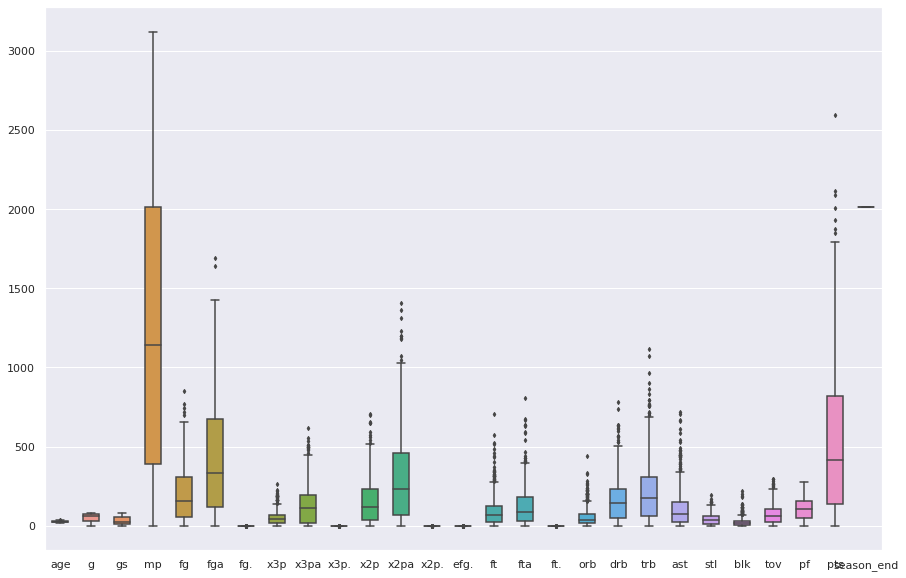

In [30]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=nba, width= 0.5,ax=ax,  fliersize=3)

In [45]:
outlier_columns=['x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa','ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts']

for column in nba:
    if column in outlier_columns:
        q = nba[column].quantile(0.98)
        # we are removing the top 2% data from the Pregnancies column
        nba = nba[nba[column]<q]

<AxesSubplot:>

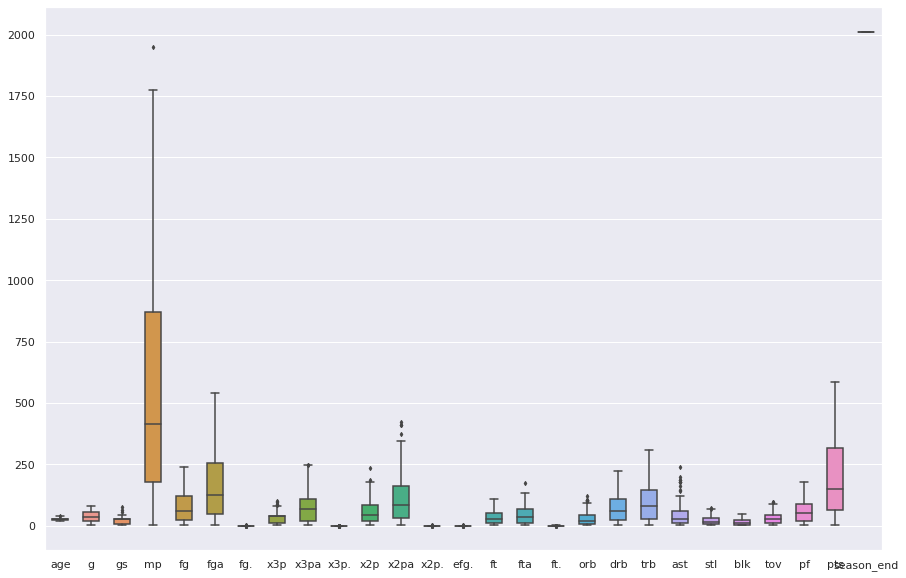

In [47]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=nba, width= 0.5,ax=ax,  fliersize=3)

/home/launchship/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/launchship/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/launchship/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

/home/launchship/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/launchship/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/launchship/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

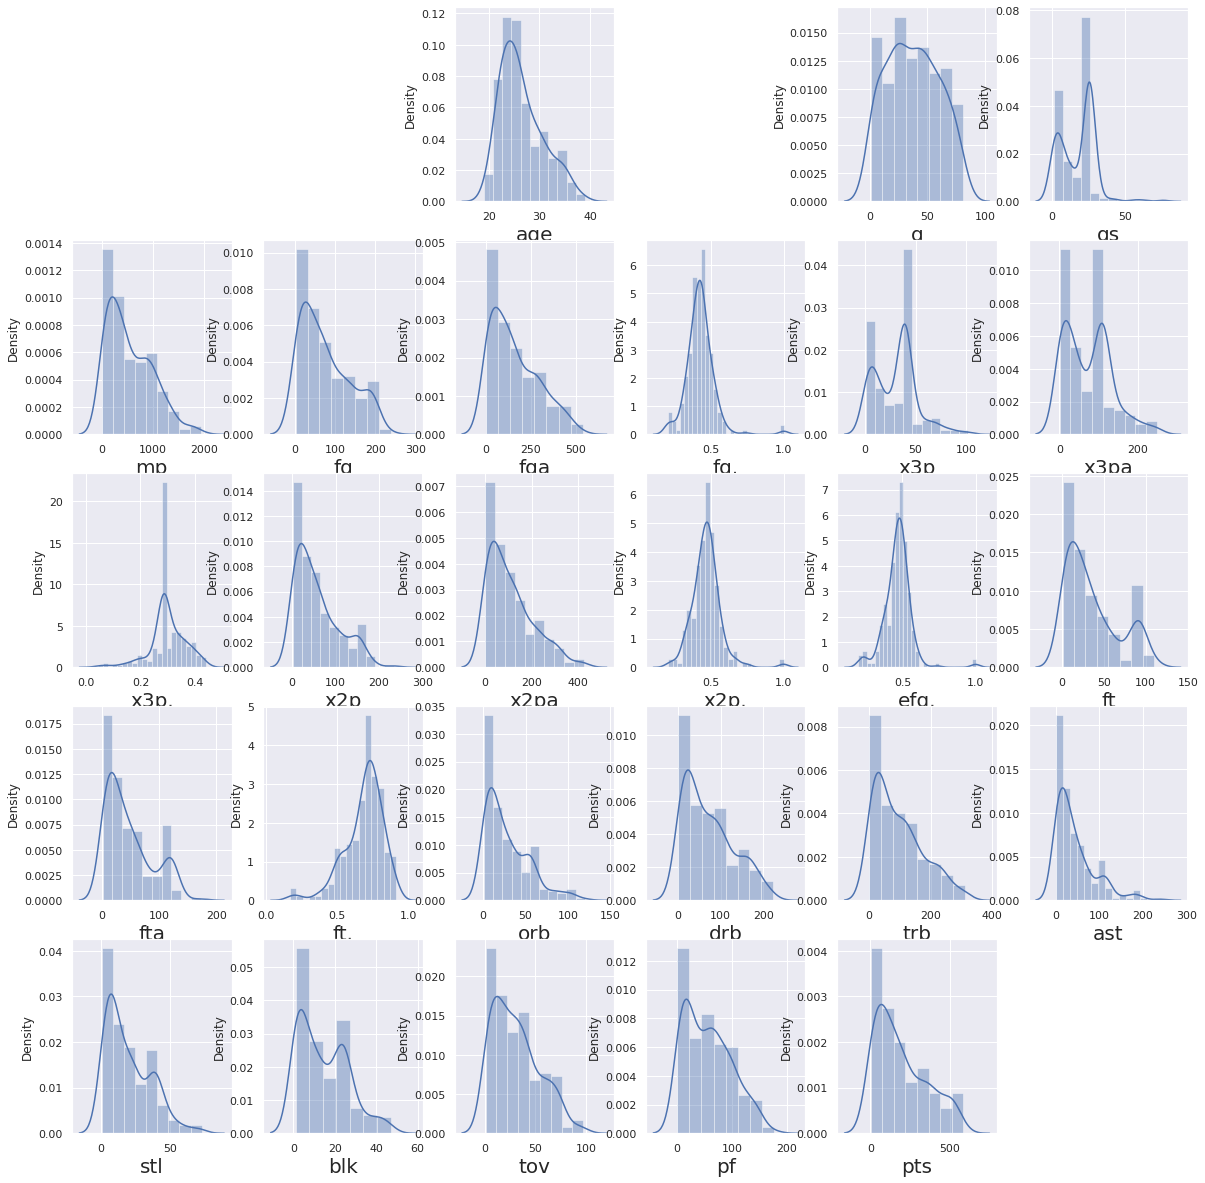

In [48]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in nba:
    if plotnumber<=31 and column not in cat_columns :     # as there are 9 columns in the data
        ax = plt.subplot(6,6,plotnumber)
        sns.distplot(nba[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [58]:
X = nba.drop(columns = ['pts','season','pos','player','bref_team_id'])
y = nba['pts']

In [67]:
X.columns

Index(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
       'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'season_end'],
      dtype='object')

/home/launchship/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/launchship/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/launchship/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

/home/launchship/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/launchship/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/launchship/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

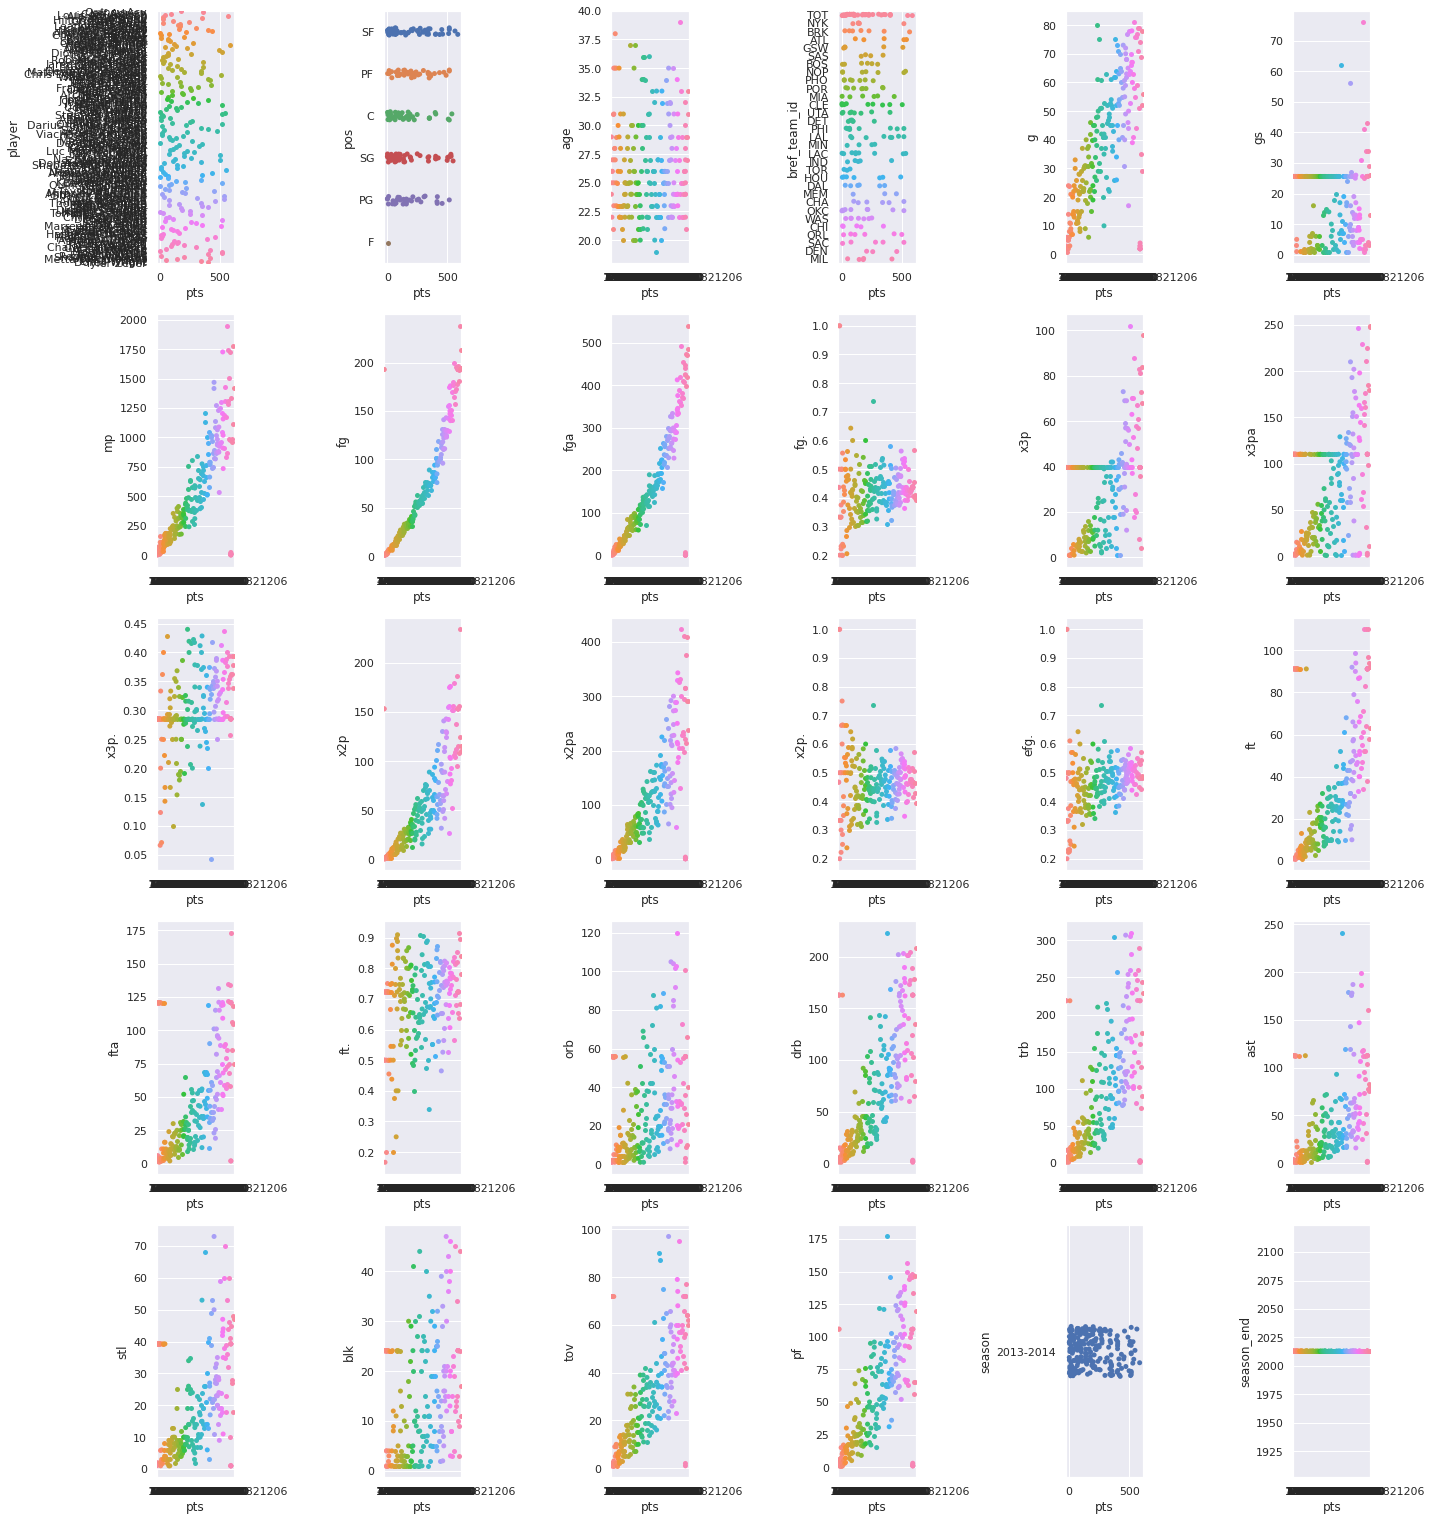

In [52]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=31 :
        ax = plt.subplot(6,6,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [69]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [70]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

/home/launchship/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,vif,Features
0,1.137673,age
1,6.228353,g
2,1.160608,gs
3,13.449388,mp
4,598.802862,fg
5,371.495854,fga
6,52.893518,fg.
7,6.904797,x3p
8,4.411845,x3pa
9,3.961641,x3p.


In [104]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size= 0.25)

In [105]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [106]:
y_pred = knn.predict(x_test)

In [107]:
knn.score(x_train,y_train)

0.8833028988544468

In [108]:
len(y_pred)

55

In [109]:
len(y_test)

55

In [110]:
type(y_pred)

numpy.ndarray

In [111]:
knn.score(x_test,y_test)

0.5581087574590041

In [114]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [115]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [116]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.796, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.805, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.762, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.786, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.926, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.733, total=   0.0s
[CV] algorith

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=11, score=0.672, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=11, score=0.743, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=11, score=0.882, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=11, score=0.906, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=12, score=0.633, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=12, score=0.673, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=12, score=0.741, 

[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=3, score=0.786, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=3, score=0.926, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=5, score=0.733, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=5, score=0.755, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=5, score=0.830, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=5, score=0.873, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=5, score=0.931, total= 

[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=10, score=0.686, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=10, score=0.757, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=10, score=0.888, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=10, score=0.906, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.645, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.672, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.743, 

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, score=0.882, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, score=0.903, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=3, score=0.796, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=3, score=0.805, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=3, score=0.762, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=3, score=0.786, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=3, score=0.926, total

[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=9, score=0.889, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=9, score=0.917, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.658, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.686, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.757, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.888, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.906, to

[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=13, score=0.882, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=13, score=0.903, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.796, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.805, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.762, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.786, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.926, total=   0.0s
[CV] 

[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=9, score=0.696, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=9, score=0.763, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=9, score=0.889, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=9, score=0.917, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.658, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.686, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.757, total=   0.0s
[CV]

[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=12, score=0.881, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=12, score=0.906, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.630, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.670, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.725, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.882, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.903, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=10, score=0.658, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=10, score=0.686, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=10, score=0.757, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=10, score=0.888, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=10, score=0.906, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.645, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.672, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=13, score=0.630, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=13, score=0.670, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=13, score=0.725, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=13, score=0.882, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=13, score=0.903, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=3, score=0.796, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=3, score=0.805, total=   0.0s
[CV] a

[CV]  algorithm=brute, leaf_size=20, n_neighbors=13, score=0.882, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=13, score=0.903, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.796, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.805, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.762, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.786, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.926, total=   0.0s
[CV] algorithm=brut

[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.889, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.917, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=10, score=0.658, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=10, score=0.686, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=10, score=0.757, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=10, score=0.888, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=10, score=0.906, total=   0.0s
[CV] algorithm=b

[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, score=0.882, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, score=0.903, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=3, score=0.796, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=3, score=0.805, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=3, score=0.762, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=3, score=0.786, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=3, score=0.926, total=   0.0s
[CV] algorithm=brut

[CV]  algorithm=brute, leaf_size=34, n_neighbors=9, score=0.889, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=9, score=0.917, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=10, score=0.658, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=10, score=0.686, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=10, score=0.757, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=10, score=0.888, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=10, score=0.906, total=   0.0s
[CV] algorithm=b

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:    6.2s finished


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [117]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 5}

In [122]:
knn = KNeighborsRegressor(algorithm = 'ball_tree', leaf_size =18, n_neighbors =7)

In [123]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=18, n_neighbors=7)

In [124]:
knn.score(x_train,y_train)

0.8680747228881553

In [125]:
knn.score(x_test,y_test)

0.517267821657821

In [126]:
XX=X.drop(columns=['x2p','trb','efg.','x2pa','x2p','fg','fga','fg.'])

In [127]:
XX.columns

Index(['age', 'g', 'gs', 'mp', 'x3p', 'x3pa', 'x3p.', 'x2p.', 'ft', 'fta',
       'ft.', 'orb', 'drb', 'ast', 'stl', 'blk', 'tov', 'pf', 'season_end'],
      dtype='object')

In [130]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(XX)

In [146]:
XX.iloc[1:3]

,age,g,gs,mp,x3p,x3pa,x3p.,x2p.,ft,fta,ft.,orb,drb,ast,stl,blk,tov,pf,season_end
2,27,53,12.0,961,39.613306,110.130977,0.285111,0.520000,76.0,119.0,0.639,102.0,204.0,38.0,24.0,36.0,39.0,108.0,2013
5,25,46,2.0,330,39.613306,110.130977,0.285111,0.540984,26.0,30.0,0.867,37.0,92.0,14.0,8.0,30.0,18.0,40.0,2013


In [147]:
y[1:3]

2    362.0
5     92.0
Name: pts, dtype: float64

In [132]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = XX.columns

#let's check the values
vif

,vif,Features
0,1.113364,age
1,5.795052,g
2,1.119104,gs
3,8.817012,mp
4,3.858103,x3p
5,3.474011,x3pa
6,1.466866,x3p.
7,1.214442,x2p.
8,4.376828,ft
9,4.771969,fta


In [138]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25)

In [139]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [140]:
y_pred = knn.predict(x_test)

In [141]:
knn.score(x_train,y_train)

0.8027803423098381

In [142]:
knn.score(x_test,y_test)

0.5349462839956836

In [144]:
import pickle

with open('modelForPrediction.sav', 'wb') as f:
    pickle.dump(knn,f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [151]:
data=[[27,53,12.0,961,39.613306,110.130977,0.285111,0.520000,76.0,119.0,0.639,102.0,204.0,38.0,24.0,36.0,39.0,108.0,2013]]
print(knn.predict(scalar.fit_transform(data)))
print(knn.predict(data))

[232.8]
[497.]


In [152]:
data=[[25,46,2.0,330,39.613306,110.130977,0.285111,0.540984,26.0,30.0,0.867,37.0,92.0,14.0,8.0,30.0,18.0,40.0,2013]]
print(knn.predict(scalar.fit_transform(data)))
print(knn.predict(data))

[232.8]
[487.6]
